In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
width = 150
height = 150
train_data = keras.utils.image_dataset_from_directory(
    directory="images/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(width,height)
)

val_data = keras.utils.image_dataset_from_directory(
    directory="images/validation",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(width,height)
)


Found 60000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
def process(image,label):
    image=tf.cast(image/255, tf.float32)
    return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(width,height,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [5]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [6]:
checkpoint_callback = ModelCheckpoint("model150.h5", monitor="val_loss", save_best_only=True, mode="min")
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = model.fit(train_data, epochs=30, validation_data=val_data, callbacks=[checkpoint_callback, early_stopping])

Epoch 1/30
1875/1875 [==============================] - ETA: 0s - loss: 0.8595 - accuracy: 0.6920

c:\Users\zivad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 3091s 2s/step - loss: 0.8595 - accuracy: 0.6920 - val_loss: 0.5352 - val_accuracy: 0.7198
Epoch 2/30
1875/1875 [==============================] - 3963s 2s/step - loss: 0.4792 - accuracy: 0.7727 - val_loss: 0.4428 - val_accuracy: 0.7812
Epoch 3/30
1875/1875 [==============================] - 3222s 2s/step - loss: 0.3940 - accuracy: 0.8228 - val_loss: 0.4930 - val_accuracy: 0.8130
Epoch 4/30
1875/1875 [==============================] - 2911s 2s/step - loss: 0.3061 - accuracy: 0.8661 - val_loss: 0.3083 - val_accuracy: 0.8612
Epoch 5/30
1875/1875 [==============================] - 2755s 1s/step - loss: 0.2495 - accuracy: 0.8914 - val_loss: 0.2866 - val_accuracy: 0.8860
Epoch 6/30
1875/1875 [==============================] - 2736s 1s/step - loss: 0.2098 - accuracy: 0.9104 - val_loss: 0.3279 - val_accuracy: 0.8908
Epoch 7/30
1875/1875 [==============================] - 2743s 1s/step - loss: 0.1823 - accuracy: 0.9228 - val_loss: 0.3481 - val_accura

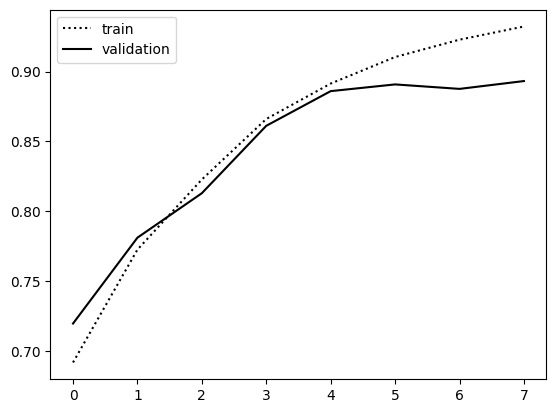

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], linestyle='dotted',color='black', label='train')
plt.plot(history.history['val_accuracy'], linestyle='solid',color='black', label='validation')
plt.legend()
plt.show()

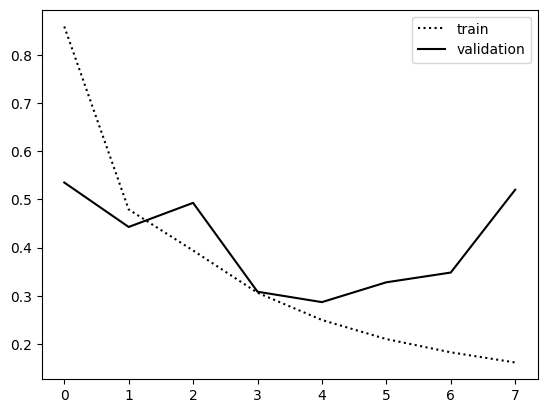

In [9]:
plt.plot(history.history['loss'], linestyle='dotted', color='black', label='train')
plt.plot(history.history['val_loss'], linestyle='solid', color='black', label='validation')
plt.legend()
plt.show()